In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train_set = pd.read_csv("/kaggle/input/titanic/train.csv")
test_set = pd.read_csv("/kaggle/input/titanic/test.csv")

In [2]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_set_trimmed = train_set.drop(['Ticket', 'Name'], axis=1)
train_set_trimmed.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_set_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [6]:
# cabin missing too many values --> drop it
train_set_trimmed.drop('Cabin', axis=1, inplace=True)
train_set_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [7]:
train_set_trimmed['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [8]:
train_set_trimmed[train_set_trimmed['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [9]:
train_set_num = train_set_trimmed.drop(['Sex', 'Embarked', 'Pclass'], axis=1)

In [10]:
# separate predictors from labels

train_set_num.drop('Survived', axis=1, inplace=True)  # numerical predictors 
train_set_cat = train_set_trimmed[['Sex', 'Embarked', 'Pclass']]  # categorical predictors
train_set_labels = train_set_trimmed['Survived'].copy()

In [11]:
train_set_num.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_set_cat.describe()

,Pclass
count,891.000000
mean,2.308642
std,0.836071
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


In [13]:
train_set_labels.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

**Data Tranformations**

In [14]:
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy='median')
cat_imp = SimpleImputer(strategy='most_frequent')

In [15]:
num_imp.fit(train_set_num)
cat_imp.fit(train_set_cat)

print("Num:", num_imp.statistics_)
print("Cat:", cat_imp.statistics_)

Num: [446.      28.       0.       0.      14.4542]
Cat: ['male' 'S' 3]


In [16]:
X_num = num_imp.transform(train_set_num)
X_cat = cat_imp.transform(train_set_cat)

train_set_imp_num = pd.DataFrame(X_num, columns=train_set_num.columns, index=train_set_num.index)
train_set_imp_cat = pd.DataFrame(X_cat, columns=train_set_cat.columns, index=train_set_cat.index)

In [17]:
train_set_imp_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    891 non-null float64
Age            891 non-null float64
SibSp          891 non-null float64
Parch          891 non-null float64
Fare           891 non-null float64
dtypes: float64(5)
memory usage: 34.9 KB


In [18]:
train_set_imp_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
Sex         891 non-null object
Embarked    891 non-null object
Pclass      891 non-null object
dtypes: object(3)
memory usage: 21.0+ KB


In [19]:
# handling categorical data
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

train_cat_1hot = cat_encoder.fit_transform(train_set_imp_cat)
train_cat_1hot

<891x8 sparse matrix of type '<class 'numpy.float64'>'
	with 2673 stored elements in Compressed Sparse Row format>

In [20]:
train_cat_1hot.toarray()  
# first two columns for Sex
# last three columns for Embarked

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [21]:
cat_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array([1, 2, 3], dtype=object)]

**Tranformation Pipeline**

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

train_set_num_tr = num_pipeline.fit_transform(train_set_num)

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('1hot', OneHotEncoder())
])

train_set_cat_tr = cat_pipeline.fit_transform(train_set_cat)

In [23]:
from sklearn.compose import ColumnTransformer

train_set_final = train_set_trimmed.drop(['PassengerId', 'Survived'], axis=1)
train_set_num.drop('PassengerId', axis=1, inplace=True)

num_attribs = list(train_set_num)
cat_attribs = list(train_set_cat)

# pipline of transformations for both numerical and categorical attribs
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])


train_set_prepared = full_pipeline.fit_transform(train_set_final)

In [24]:
train_set_prepared

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ]])

**Random Forest Classifier**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, train_set_prepared, train_set_labels,
                                   method='predict_proba')

y_scores_forest = y_probas_forest[:, 1] # prob of positive

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.ylabel("True Positive Rate (Recall)", fontsize=16)
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

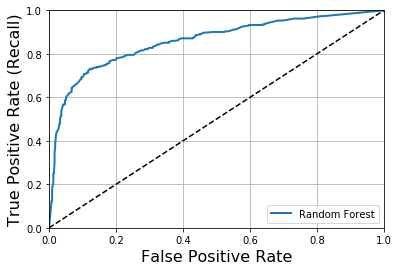

In [27]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_set_labels, y_scores_forest)

plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [28]:
print('ROC-AUC Score:', roc_auc_score(train_set_labels, y_scores_forest))

ROC-AUC Score: 0.8581498524696686


In [29]:
y_train_pred_forest = cross_val_predict(forest_clf, train_set_prepared, train_set_labels, cv=3)
# Random Forest classifier precision and recall
print('Precision:', precision_score(train_set_labels, y_train_pred_forest))
print('Recall:', recall_score(train_set_labels, y_train_pred_forest))

Precision: 0.7431192660550459
Recall: 0.7105263157894737


In [30]:
print(cross_val_score(forest_clf, train_set_prepared, train_set_labels, cv=3))

[0.76094276 0.82828283 0.79461279]


In [31]:
# test = pd.read_csv("../input/titanic/test.csv")
# test_prepared = full_pipeline.fit_transform(test)
# forest_clf.fit(train_set_prepared, train_set_labels)
# predictions = forest_clf.predict(test_prepared)

In [32]:
# final_list = [int(i) for i in predictions]
# output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': final_list})
# output.to_csv("Titanic_SVC", index = False)

In [33]:
from sklearn.svm import SVC

svc_clf = SVC(gamma='auto')
svc_clf.fit(train_set_prepared, train_set_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
print(cross_val_score(svc_clf, train_set_prepared, train_set_labels, cv=3))

[0.81144781 0.83164983 0.83164983]


In [35]:
test = pd.read_csv("../input/titanic/test.csv")
test_prepared = full_pipeline.fit_transform(test)
svc_clf.fit(train_set_prepared, train_set_labels)
predictions = svc_clf.predict(test_prepared)

final_list = [int(i) for i in predictions]
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': final_list})
output.to_csv("Titanic_SVC", index = False)